# Exploratory Data Analysis (EDA) on Wage dataset


In [1]:
# different libraries have been imported for using 
#different packages to plot,load etc
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as st
import scipy.stats
from sklearn.preprocessing import LabelEncoder
from scipy import stats

In [2]:
from bokeh.io import output_notebook
output_notebook()

from bokeh.plotting import figure
from bokeh.io import show

Loading BokehJS ...

In [3]:
#the data is being loaded into the variable using pandas 
#library and first five rows is being displayed
wages=pd.read_csv('C://Users//AMAN SRIVASTAVA//OneDrive//Desktop//Aishwarya//Assignment//wage.csv')
wages.head()

,married,hourly_wage,years_in_education,years_in_employment,num_dependents,gender,race
0,1.0,3.24,12.0,2.0,3.0,female,white
1,0.0,3.00,11.0,0.0,2.0,male,white
2,1.0,6.00,8.0,28.0,0.0,male,white
3,1.0,5.30,12.0,2.0,1.0,male,white
4,1.0,8.75,16.0,8.0,0.0,male,white


In [4]:
#number of rows and columns of wages in the dataframe
wages.shape
#there are 7 columns and 525 rows in the dataset

(525, 7)

In [5]:
#gives information about the dataframe such as column labels, column data types,
#number of cells in each column,non-null counts.
wages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525 entries, 0 to 524
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   married              522 non-null    float64
 1   hourly_wage          517 non-null    float64
 2   years_in_education   522 non-null    float64
 3   years_in_employment  519 non-null    float64
 4   num_dependents       520 non-null    float64
 5   gender               521 non-null    object 
 6   race                 515 non-null    object 
dtypes: float64(5), object(2)
memory usage: 28.8+ KB


In [6]:
#descriptive statistics  different variables in the dataframe
#this gives the mean,standard deviation ,count,minimum and maximum
#values 25%, 50% and 75% quartile ranges of different variables
wages.describe()

,married,hourly_wage,years_in_education,years_in_employment,num_dependents
count,522.000000,517.000000,522.000000,519.000000,520.000000
mean,0.609195,5.917737,12.557471,5.152216,1.044231
std,0.488399,3.699058,2.757219,7.257133,1.258484
min,0.000000,0.530000,0.000000,0.000000,0.000000
25%,0.000000,3.350000,12.000000,0.000000,0.000000
50%,1.000000,4.670000,12.000000,2.000000,1.000000
75%,1.000000,6.880000,14.000000,7.000000,2.000000
max,1.000000,24.980000,18.000000,44.000000,6.000000


As we can see that the mean hourly wage is 5.91 and the maximum wage is 24.98 where as the minumum wage is 0.53.One of the person has 6 dependents and the maximum a person has work experience is for 44 years

In [7]:
#check for null values and its count in the dataset and
#creating a new variable to keep the original dataset
#the is null function is used to check for null values
wage_new = wages
wage_new.isnull().sum()

married                 3
hourly_wage             8
years_in_education      3
years_in_employment     6
num_dependents          5
gender                  4
race                   10
dtype: int64

In [8]:
#there are 4 continuous variables with null values, those null values
#are filled with mean of that variable.We are  filling the hourly wage , years in education,
#years in employement and number of dependents with their mean.
wage_new['hourly_wage'] = wage_new['hourly_wage'].fillna(wage_new.hourly_wage.mean())
wage_new['years_in_education'] = wage_new['years_in_education'].fillna(wage_new.years_in_education.mean())
wage_new['years_in_employment'] = wage_new['years_in_employment'].fillna(wage_new.years_in_employment.mean())
wage_new['num_dependents'] = wage_new['num_dependents'].fillna(wage_new.num_dependents.mean())

In [9]:
#there are 3 categorical variables with null values, those null values
#are filled with the mode of gender, race and married variables
married_mode= wage_new.married.mode()[0]
wage_new.married.fillna(married_mode, inplace=True)
gender_mode = wage_new.gender.mode()[0]
wage_new.gender.fillna(gender_mode, inplace=True)
race_mode = wage_new.race.mode()[0]
wage_new.race.fillna(race_mode, inplace=True)

In [10]:
#getting count of null values again, we see that there are no null values
wage_new.isnull().sum()

married                0
hourly_wage            0
years_in_education     0
years_in_employment    0
num_dependents         0
gender                 0
race                   0
dtype: int64

array([[<AxesSubplot:title={'center':'hourly_wage'}>,
        <AxesSubplot:title={'center':'years_in_education'}>],
       [<AxesSubplot:title={'center':'years_in_employment'}>,
        <AxesSubplot:>]], dtype=object)

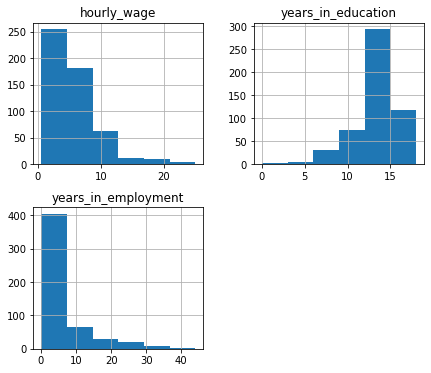

In [11]:
#Using a histogram to visualise the distribution of multiple variables.
#here we have displayed the disribution of hourly wage, years in education and
#years in employement variables keeping the pins as 6 which means that the bars that is 
#plotted,the height of which shows the number of data pointsin that bin.
wage_new.hist(column=['hourly_wage','years_in_education','years_in_employment'],bins=6, figsize=(7,6))

The are more than 450 people having hourly_wage less than 10, there are more than 275 people who have spent 12 to 15 years in education and there are about 400 people who have less than 10 years of work experience.The hourly wage and years in employement is right skewed and the years in education is left skewed.

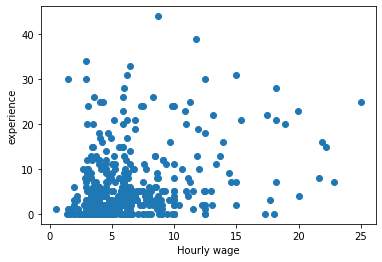

In [12]:
#using scatter plot to Visualize of a pair of continuous variables
#we have plotted tthe scatter plot between hourly wage and years in employement
plt.scatter(wage_new.hourly_wage, wage_new.years_in_employment)
plt.xlabel("Hourly wage")
plt.ylabel("experience")
plt.show()

The plot depicts that there is a huge chunk of people who have work experience of less than 15 years and they have hourly wage of less than 10. There is only one person who has an experience of almost 30 years with hourly wage of 25.One person has experiance of more than 40 years and the hourly wage is less than 10.

In [13]:
#correlation is used to determine the strenge of the variables
#we are checking for the correlation between hourly wage and work experience
scipy.stats.pearsonr(wage_new.hourly_wage, wage_new.years_in_employment)[0]

0.3409752848522271

there is weak relation between hourly wage and work experience.so the years in employment does not have very good influence on hourly wage.

<AxesSubplot:>

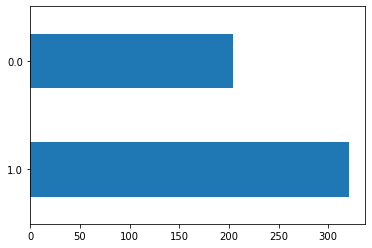

In [14]:
#using bargraph for visualizing the unique values of categorical variable
#here we are trying to visualize the married variable
wage_new['married'].value_counts().plot.barh()

This graph depicts that there are more number of people who are married. 1 is for people who are married and 0 is for unmarried.

<AxesSubplot:>

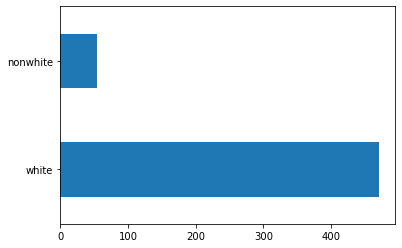

In [15]:
#Using bar graph for visualizing the distribution of race variable
wage_new['race'].value_counts().plot.barh()

There are more number of white people than the non-white people in the data

<AxesSubplot:>

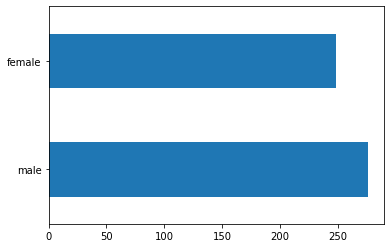

In [16]:
#plotting the ditribution of gender using bar graph
wage_new['gender'].value_counts().plot.barh()

from the data it can be understood that it has about 275 male and females are less than 250

In [17]:
#Make a contingency table to show how frequently different values 
#of the two categorical variables occur together.
cont_table1 = pd.crosstab(wage_new['gender'], wage_new['race'])
# printing the contingency table
cont_table1
#we see that there are 224 white females and 247 white males

race,nonwhite,white
gender,,
female,25,224
male,29,247


Using chi-square test we will be determining the test of independence

null hypothesis : gender is not dependent on race.

alternate hypothesis : gender is dependent on the race.

<AxesSubplot:xlabel='gender'>

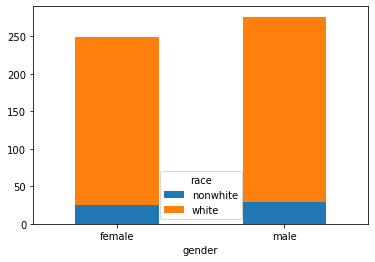

In [18]:
#using stacked bar graph to plot the contingency table 
cont_table1.plot(kind="bar", stacked=True, rot=0)

As per the graph most of the males and females are white. We can also infer from the graph that there are more number of  whites in both male and female.

In [19]:
#performing  chi-square test
chi2, p_val, dof, expected = stats.chi2_contingency(cont_table1)
print(f"p-value: {p_val}")

p-value: 0.9744235870731893


Since the p-value is greater than 0.05, so we fail to reject the null hypothesis. Hence race and gender are not dependent on each other.Thus for a decision the race will not effect gender.

In [20]:
#creating a subset using two conditions one of them is players 
#who have hourly wage less than 12 and the other is their race is white
subset1_data = wage_new[(wage_new.hourly_wage < 12) & (wage_new.race == 'white')]
subset1_data.head()
#the data below shows the first five rows of the used conditions

,married,hourly_wage,years_in_education,years_in_employment,num_dependents,gender,race
0,1.0,3.24,12.0,2.0,3.0,female,white
1,0.0,3.00,11.0,0.0,2.0,male,white
2,1.0,6.00,8.0,28.0,0.0,male,white
3,1.0,5.30,12.0,2.0,1.0,male,white
4,1.0,8.75,16.0,8.0,0.0,male,white


In [21]:
#creating another subset using two conditions where one of them is player
#whose gender is male and the other is having studied for less than 10 years
subset2_data = wage_new[(wage_new.gender == 'male') & (wage_new.years_in_education < 10)]
subset2_data.head()

,married,hourly_wage,years_in_education,years_in_employment,num_dependents,gender,race
2,1.0,6.00,8.0,28.0,0.0,male,white
36,1.0,3.51,4.0,15.0,5.0,male,white
56,0.0,10.00,8.0,0.0,0.0,male,nonwhite
79,1.0,4.50,9.0,5.0,4.0,male,white
87,1.0,9.85,8.0,24.0,2.0,male,nonwhite


In [22]:
#statistical summary for the retrieved from the first subset of data
subset1_data.describe()

,married,hourly_wage,years_in_education,years_in_employment,num_dependents
count,438.000000,438.000000,438.000000,438.000000,438.000000
mean,0.609589,5.171915,12.456883,4.613610,1.009637
std,0.488400,2.309067,2.618449,6.790882,1.225183
min,0.000000,0.530000,0.000000,0.000000,0.000000
25%,0.000000,3.300000,12.000000,0.000000,0.000000
50%,1.000000,4.500000,12.000000,2.000000,1.000000
75%,1.000000,6.345000,14.000000,6.000000,2.000000
max,1.000000,11.980000,18.000000,44.000000,6.000000


From the data in subset one we can infer that on a count of 438 samples the hourly wage is 5.17 and the maximum wage is 11.98. there is a sample that has a maximum of 12 years in education.

In [23]:
#stastical summary for the retrieved from the second subset of data
subset2_data.describe()

,married,hourly_wage,years_in_education,years_in_employment,num_dependents
count,33.000000,33.000000,33.000000,33.000000,33.000000
mean,0.666667,4.571447,7.242424,9.515152,1.878788
std,0.478714,2.301427,1.904441,10.350487,2.057875
min,0.000000,1.500000,2.000000,0.000000,0.000000
25%,0.000000,3.000000,6.000000,0.000000,0.000000
50%,1.000000,3.760000,8.000000,6.000000,1.000000
75%,1.000000,5.200000,8.000000,17.000000,3.000000
max,1.000000,10.000000,9.000000,30.000000,6.000000


From the data in subset 2, we see that on a count of 33 sample the mean is only 4.57 and the maximum wag eis 10.
A sample has a maximum of 12 years in education.

In [24]:
#retrieveing data of hourly wage of male and female and storing it a variable
male = wage_new[wage_new['gender'] == 'male']['hourly_wage']
female = wage_new[wage_new['gender'] == 'female']['hourly_wage']
#We will use the male and female variables to find if there is difference between the means of two variables

Independent two sample test is used to determine if there is a difference in the mean of two groups.

null hypothesis : there is a no significant difference between means of hourly wage of male

alternate hypothesis :there is a significant difference between means of hourly wage of female

In [25]:
# for independet two sample test we have used a pre-defiend function ttest_ind
t_val, p_val = stats.ttest_ind(male, female)
#We have printed the value of t and p
print(f"t-value: {t_val}, p-value: {p_val}")

t-value: 8.031421687181917, p-value: 6.421537070785262e-15


p-value is less than 0.05, hence we reject null hypothesis.Thus there is difference in the means of hourly wage of males and females. The males and females have different hourly pay.

In [26]:
#generating the table using gender which is a categorical variable and grouping the data 
# a groupby function can be used to group using gender 
gender_data = wage_new.groupby(['gender'])
gender_data.head()

,married,hourly_wage,years_in_education,years_in_employment,num_dependents,gender,race
0,1.0,3.24,12.0,2.0,3.0,female,white
1,0.0,3.00,11.0,0.0,2.0,male,white
2,1.0,6.00,8.0,28.0,0.0,male,white
3,1.0,5.30,12.0,2.0,1.0,male,white
4,1.0,8.75,16.0,8.0,0.0,male,white
5,0.0,11.25,18.0,7.0,0.0,male,white
6,0.0,5.00,12.0,3.0,0.0,female,white
7,0.0,3.60,12.0,4.0,2.0,female,white
9,0.0,6.25,16.0,2.0,0.0,female,white
10,0.0,8.13,13.0,0.0,0.0,female,white


In [27]:
#summarizing the information for each group by gender
gender_data.describe()

married                                              hourly_wage  \
         count      mean       std  min  25%  50%  75%  max       count   
gender                                                                    
female   249.0  0.526104  0.500324  0.0  0.0  1.0  1.0  1.0       249.0   
male     276.0  0.688406  0.463986  0.0  0.0  1.0  1.0  1.0       276.0   

                  ... years_in_employment       num_dependents            \
            mean  ...                 75%   max          count      mean   
gender            ...                                                      
female  4.638419  ...                 5.0  34.0          249.0  1.064790   
male    7.071904  ...                 9.0  44.0          276.0  1.025683   

                                           
             std  min  25%  50%  75%  max  
gender                                     
female  1.186212  0.0  0.0  1.0  2.0  5.0  
male    1.311241  0.0  0.0  0.0  2.0  6.0  

[2 rows x 40 columns]

# Linear regression

In [28]:
#label encoding is needed for categorical variables in order to use them in the model
#label encoder codes the coategorial variable to the number of categories in that particular
#variable. Here we hace encoded gender,race and married variable to 1 and 0.
en = LabelEncoder()
wage_new['gender'] = en.fit_transform(wage_new['gender'].astype('object'))
wage_new['race'] = en.fit_transform(wage_new['race'].astype('object'))
wage_new['married'] = en.fit_transform(wage_new['married'].astype('float'))
wage_new.head()

,married,hourly_wage,years_in_education,years_in_employment,num_dependents,gender,race
0,1,3.24,12.0,2.0,3.0,0,1
1,0,3.00,11.0,0.0,2.0,1,1
2,1,6.00,8.0,28.0,0.0,1,1
3,1,5.30,12.0,2.0,1.0,1,1
4,1,8.75,16.0,8.0,0.0,1,1


In [29]:
#A linear regression model is a statistical process to determine the relation between 
#dependent and independent variable.Here the dependent variable is hourly wage and married,
#years in education,years in employment,number of dependents,gender, race are independent variables
#carring out linear regression model using all the variables in the dataframe
wage_model1 = st.OLS.from_formula("hourly_wage ~ married + years_in_education + years_in_employment + num_dependents + gender + race", data = wage_new).fit()
wage_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            hourly_wage   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     46.48
Date:                Fri, 25 Mar 2022   Prob (F-statistic):           1.51e-45
Time:                        09:05:14   Log-Likelihood:                -1314.1
No. Observations:                 525   AIC:                             2642.
Df Residuals:                     518   BIC:                             2672.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -2.7680      0.760     -3.644      0.000      -4.260      -1.276
married                 0.7030      0.283      2.486      0.013       0.148       1.259
years_in_education      0.5214      0.049     10.598      0.000       0.425       0.618
years_in_employment     0.1531      0.019      8.092      0.000       0.116       0.190
num_dependents          0.0957      0.108      0.882      0.378      -0.117       0.309
gender                  1.6732      0.268      6.240      0.000       1.146       2.200
race                   -0.0665      0.431     -0.154      0.878      -0.914       0.781
==============================================================================
Omnibus:                      206.380   Durbin-Watson:                   1.808
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              881.856
Skew:                           1.747   Prob(JB):                    3.22e-192
Kurtosis:                       8.302   Cond. No.                         86.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This is not a good model as r-square and adjusted r-square is 0.3, so the model is not at all perfect. We see that that there are two variables that are insignificant i.e. They have p>0.05, so we need to remove the variables in order to make our model parsimonious. The two variables that have p>0.05 do not contribute to the model.

In [30]:
#We are creating another model and will try to get a model in which the variables have p less that 0.05
wage_model2 = st.OLS.from_formula("hourly_wage ~ married + years_in_education + years_in_employment + gender ", data = wage_new).fit()
wage_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            hourly_wage   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     69.67
Date:                Fri, 25 Mar 2022   Prob (F-statistic):           3.22e-47
Time:                        09:05:14   Log-Likelihood:                -1314.5
No. Observations:                 525   AIC:                             2639.
Df Residuals:                     520   BIC:                             2660.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -2.6107      0.631     -4.139      0.000      -3.850      -1.372
married                 0.7447      0.277      2.688      0.007       0.200       1.289
years_in_education      0.5106      0.048     10.709      0.000       0.417       0.604
years_in_employment     0.1520      0.019      8.064      0.000       0.115       0.189
gender                  1.6709      0.268      6.241      0.000       1.145       2.197
==============================================================================
Omnibus:                      206.433   Durbin-Watson:                   1.813
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              883.570
Skew:                           1.746   Prob(JB):                    1.37e-192
Kurtosis:                       8.310   Cond. No.                         69.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

After many tries and  removal of race and num_dependents variable we get a parisimonious model i.e. all the variables are significant.
There are 4 variables that contribute to the model.Hence we have created a relation between independent and dependent varibale. The relationship has been created by multiplying the coeffients with the variables form the summary table abd adding the intercept.

𝐻𝑜𝑢𝑟𝑙𝑦𝑊𝑎𝑔𝑒=−2.6107+0.7447∗𝑚𝑎𝑟𝑟𝑖𝑒𝑑+0.5106∗𝑌𝑒𝑎𝑟𝑠𝐼𝑛𝐸𝑑𝑢𝑐𝑎𝑡𝑖𝑜𝑛+0.1520∗𝑌𝑒𝑎𝑟𝑠𝐼𝑛𝐸𝑚𝑝𝑙𝑜𝑦𝑚𝑒𝑛𝑡+1.6709∗𝑔𝑒𝑛𝑑𝑒𝑟+𝑒

The above equation can be used to predict the hourly wage.The signs of coefficient has a positive effect on the hourly wage.
The r-square and adjusted r square is 0.3 which is very low and is far from perfect.The variability in hourly wage is only 34%.Multiple variables can make a model look more reliable, even if they aren't contributing much. Because the adjusted R-squared penalises the R-squared formula depending on the number of variables, a lesser adjusted score may indicate that some variables are not correctly contributing to the model's R-squared.

In [31]:
#plotting standardised residuals and fitted values for the dependent 
#variable on a scatter plot and we will try to see if the assumption hold valid or not 
#for the for the adequacy
fig = figure(height=400, width=400)

# the x axis is the fitted values
# the y axis is the standardized residuals
st_resids = wage_model2.get_influence().resid_studentized_internal
fig.circle(wage_model2.fittedvalues, st_resids)

show(fig)

In [32]:
#plotting histogram with 10 bins
hist, edges = np.histogram(st_resids, bins=10)
res_hist = figure(height=400, width=400)
res_hist.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], line_color="white")
show(res_hist)

The assumption holds if the histogram looks to be regularly distributed.
From the scatterplot and histogram we conclude that the residual is randomly distributed but the normality of distribution of residual does not hold for this model and the zero mean residual is valid. From Jarque-Bera test on residuals, we confirm that the error are not normally distributed.Also the p-value(1.37e-192) is less than 0.05 so we reject the null hypothesis of normal distribution.
Since the assumption of normal distribution is violated, it is not an adequate model.
The removal of insignificant variables did not improve the model.

In [35]:
%%javascript
var nb = IPython.notebook;
var kernel = IPython.notebook.kernel;
var command = "NOTEBOOK_FULL_PATH = '" + nb.notebook_path + "'";
kernel.execute(command);

<IPython.core.display.Javascript object>

In [36]:
import io
from nbformat import read, NO_CONVERT

with io.open(NOTEBOOK_FULL_PATH.split("/")[-1], 'r', encoding='utf-8') as f:
    nb = read(f, NO_CONVERT)

word_count = 0
for cell in nb.cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print(f"Word count: {word_count}")

Word count: 813
